In [39]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error
import joblib
import pickle

In [40]:
train = pd.read_csv("train_Houseprice_prdiction_Preprocessed.csv")
test = pd.read_csv("test_Houseprice_prdiction_Preprocessed.csv")

In [41]:
train.head()

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_NO
0,0,0,1,1,0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,2
1,0,1,0,1,0,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,2
2,0,0,1,1,0,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,2
3,0,0,1,1,0,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,2
4,0,1,0,1,0,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,2


In [42]:
test.shape

(68720, 15)

In [43]:
train_X = train.drop(columns= ["POSTED_BY_Builder","POSTED_BY_Dealer","POSTED_BY_Owner","BHK_OR_RK_BHK","BHK_OR_RK_RK","RERA","UNDER_CONSTRUCTION","BHK_NO."])
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SQUARE_FT              29451 non-null  float64
 1   READY_TO_MOVE          29451 non-null  int64  
 2   RESALE                 29451 non-null  int64  
 3   LONGITUDE              29451 non-null  float64
 4   LATITUDE               29451 non-null  float64
 5   TARGET(PRICE_IN_LACS)  29451 non-null  float64
 6   BHK_NO                 29451 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.6 MB


In [45]:
test_X = test.drop(columns= ["POSTED_BY_Builder","POSTED_BY_Dealer","POSTED_BY_Owner","BHK_OR_RK_BHK","BHK_OR_RK_RK","RERA","UNDER_CONSTRUCTION","BHK_NO."])
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SQUARE_FT              68720 non-null  float64
 1   READY_TO_MOVE          68720 non-null  int64  
 2   RESALE                 68720 non-null  int64  
 3   LONGITUDE              68720 non-null  float64
 4   LATITUDE               68720 non-null  float64
 5   TARGET(PRICE_IN_LACS)  0 non-null      float64
 6   BHK_NO                 68720 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 3.7 MB


In [46]:
train_X.shape

(29451, 7)

In [47]:
test_X.shape

(68720, 7)

In [18]:
train_y = train["TARGET(PRICE_IN_LACS)"]
train_y.isna().sum()

0

In [19]:
sample = pd.read_csv("sample_submission.csv")

In [20]:
sample.head()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [21]:
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["TARGET(PRICE_IN_LACS)"] = pred_test
    sample.to_csv(filename, index = False)

In [22]:
sample.head()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [23]:
sample.isna().sum()

TARGET(PRICE_IN_LACS)    0
dtype: int64

RMSE of Train Data =  580.1943633898486
Cross validation Score  =  640.8933298471254


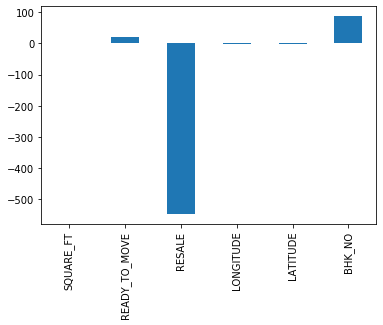

In [24]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, "test_result_Linear_regression_1.csv" )

RMSE of Train Data =  580.1989209259274
Cross validation Score  =  640.868303985297


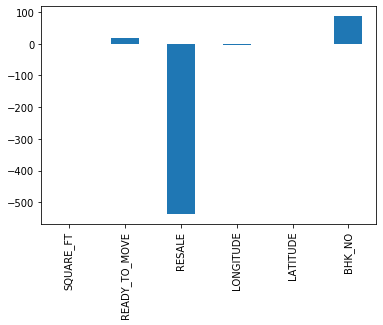

In [25]:
model = Ridge(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Ridge_regression_1.csv" )

RMSE of Train Data =  593.08040340126
Cross validation Score  =  652.2096438956755


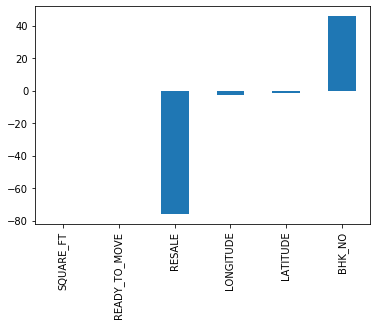

In [26]:
model = Lasso(alpha=30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Lasso_regression_1.csv" )

RMSE of Train Data =  593.2237323672405
Cross validation Score  =  652.1749722771326


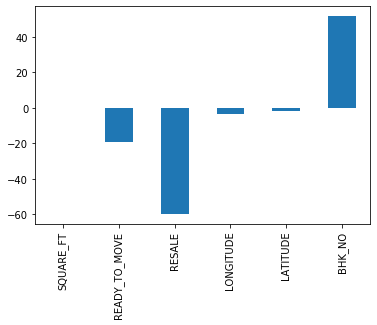

In [27]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
run_model(model, train_X, train_y, test_X, sample, "test_result_ElasticNet_regression_1.csv" )

In [48]:
X = train[["SQUARE_FT","BHK_NO","LONGITUDE","LATITUDE","RESALE","READY_TO_MOVE"]]

In [49]:
y = train["TARGET(PRICE_IN_LACS)"]

In [50]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [51]:
train_y.shape

(20615,)

In [52]:
test_y.shape

(8836,)

In [53]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [55]:
print("Train MAE = ", mean_absolute_error(train_y, train_pred))
print("Test MAE = ", mean_absolute_error(test_y, test_pred))

Train MAE =  140.5491071264672
Test MAE =  141.73449867115983


In [56]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [57]:
lmodel = joblib.load('model.pkl')

In [58]:
lmodel.predict([[1257.096513,2,22.592200,88.484911,1,1]])

array([47.12037403])